In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [16]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import sklearn
from sklearn.model_selection import KFold
from matplotlib import rcParams
import joblib
import cartopy.crs as ccrs
from sklearn.metrics import r2_score
import glob
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [5]:
# ### create lists of model groups
# model_list = ['ACCESS1-0', 'ACCESS1-3', 'ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'bcc-csm1-1_',
#              'bcc-csm1-1-m','BCC-CSM2-MR_', 'BCC-ESM1', 'BNU-ESM', 'CAMS-CSM1-0', 'CanESM2', 'CanESM5',
#              'CCSM4', 'CESM2_', 'CESM2-WACCM', 'CNRM-CM5', 'CNRM-CM6-1','CNRM-ESM2-1','CSIRO-Mk3-6-0', 'E3SM-1-0', 'EC-Earth3-Veg', 'EC-EARTH', 'FGOALS-f3-L', 'FGOALS-g2', 'FGOALS-g3', 
#              'GFDL-CM3', 'GFDL-CM4', 'GFDL-ESM2G', 'GFDL-ESM2M', 'GFDL-ESM4',
#              'GISS-E2-1-G', 'GISS-E2-1-H', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'HadGEM3-GC31-LL',
#              'HadGEM3-GC31-MM', 'inmcm4', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'IPSL-CM6A-LR',
#              'MIROC5', 'MIROC6', 'MIROC-ES2L', 'MIROC-ESM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-CGCM3',
#              'MRI-ESM2-0', 'NESM3', 'NorESM1-M', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'UKESM1-0-LL']

# model_list_cmip5 = ['ACCESS1-0', 'ACCESS1-3', 'bcc-csm1-1_', 'bcc-csm1-1-m', 'BNU-ESM', 'CanESM2', 'CCSM4', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'EC-EARTH', 'FGOALS-g2', 'GFDL-CM3', 
#                'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'inmcm4', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC5', 'MIROC-ESM', 'MPI-ESM-LR', 'MPI-ESM-MR', 
#                     'MPI-ESM-P', 
#                 'MRI-CGCM3', 'NorESM1-M']
model_list_cmip5_1968 = ['MPI-ESM-P']
# model_list_cmip5_labels = ['ACCESS1-0', 'ACCESS1-3', 'BCC-CSM1-1', 'BCC-CSM1-1-m', 'BNU-ESM', 'CanESM2', 'CCSM4', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'EC-EARTH', 'FGOALS-g2', 
#                            'GFDL-CM3', 
#                'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'INM-CM4', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC5', 'MIROC-ESM', 'MPI-ESM-LR', 'MPI-ESM-MR',
#                            'MPI-ESM-P', 
#                 'MRI-CGCM3', 'NorESM1-M']

# model_list_cmip6 = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR_', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
#              'CESM2_', 'CESM2-WACCM', 'CNRM-CM6-1','CNRM-ESM2-1', 'E3SM-1-0', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'FGOALS-g3', 
#              'GFDL-CM4', 'GFDL-ESM4',
#              'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR',
#              'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'UKESM1-0-LL']
model_list_cmip6_1977 = ['CESM2_', 'E3SM-1-0', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'FGOALS-g3', 
             'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 
             'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON']
# model_list_cmip6_labels = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
#              'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1','CNRM-ESM2-1', 'E3SM-1-0', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'FGOALS-g3', 
#              'GFDL-CM4', 'GFDL-ESM4',
#              'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR',
#              'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'UKESM1-0-LL']
model_list1 = ['CESM2_', 
               'CESM2-WACCM', 'HadGEM3-GC31-LL', 'INM-CM4-8', 
               'INM-CM5-0', 'MPI-ESM1-2-LR', 'UKESM1-0-LL']
# model_list1 = ['UKESM1-0-LL']
# model_list1 = ['ACCESS1-0', 'ACCESS1-3', 'ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'CAMS-CSM1-0', 'CanESM5', 'CESM2_', 
#                'CESM2-WACCM', 'GFDL-CM3', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 
#                'INM-CM5-0', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL']

In [7]:
print(len(model_list1))

7


In [8]:
### all models have been interpolated to the same 5x5 degree grid
lat = netCDF4.Dataset('./data/cmip/ta/ta_Amon_ACCESS-CM2_historical-ssp_r1i1p1f1_gn.nc')['lat'][:]

In [9]:
### load 50 realisations of SWOOSH (reflecting sampling and observational uncertainty), designed for 30N-30S
swoosh_tropics = netCDF4.Dataset('./data/swoosh/SWOOSH_samples_scaleSE_1.0_scaleB_1.0_nsamples_50_aura5_finalNatGeo.nc')['samples'][:,:]
non_nan_indices = np.argwhere(~np.isnan(swoosh_tropics[:,0])).T
### only 315 monthly samples will actually be selected
print(non_nan_indices[:])
print(non_nan_indices[:].shape)

[[ 72  86  87  88  92  93  94  95  96  97  98  99 100 101 102 103 104 105
  106 107 108 109 110 111 114 116 117 118 120 121 122 123 124 126 127 128
  129 130 132 134 135 136 138 140 141 142 144 146 147 150 152 153 154 155
  156 157 158 159 161 163 164 165 167 168 169 170 171 173 174 175 176 177
  179 181 182 183 185 187 188 189 191 193 194 195 197 199 200 201 203 205
  206 207 209 211 212 213 214 215 217 218 219 220 221 223 226 228 229 230
  232 233 234 235 237 238 240 241 244 246 247 248 249 250 251 252 253 254
  255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
  273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
  291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
  309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
  327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344
  345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362
  363 364 365 366 367 368 369 370 371 

In [10]:
### prepare for data storage
dict_regr_results = {}

In [11]:
nt_train=len(swoosh_tropics[:,0])
print(nt_train)
### define the lag for the temperature to be considered over (in months)

444


In [12]:
### empty arrays to later save the change in ppmv per degree warming under 4xCO2, calculated from monthly or annual mean data
# feedbacks_true = np.empty((nr_models))
# feedbacks_pred = np.empty((nr_models))
nr_models = len(model_list1)
feedbacks_true_am = np.empty((nr_models))
feedbacks_pred_am = np.empty((nr_models))

In [13]:
## target figure x/y ratio
plt.rcParams['figure.figsize'] = [20, 4]

In [15]:
from sklearn.linear_model import LinearRegression

In [24]:
nt_train

444

CESM2_


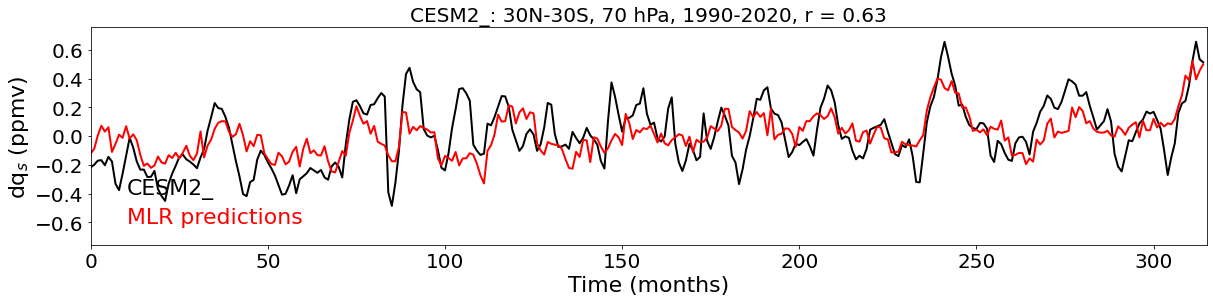

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  -0.5629170644574406


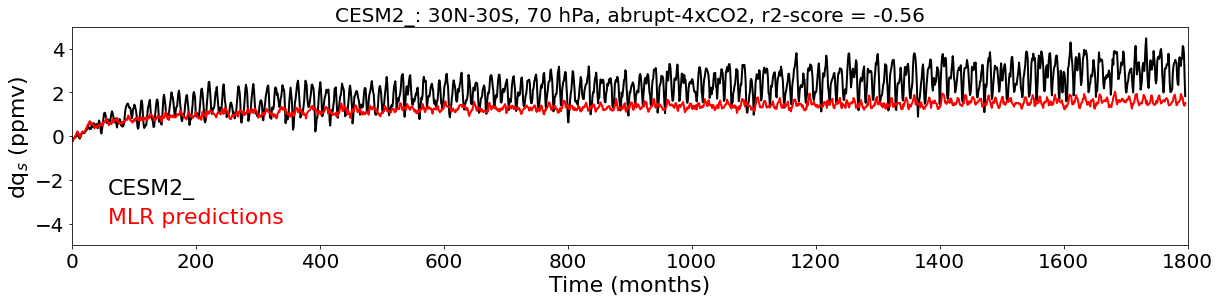

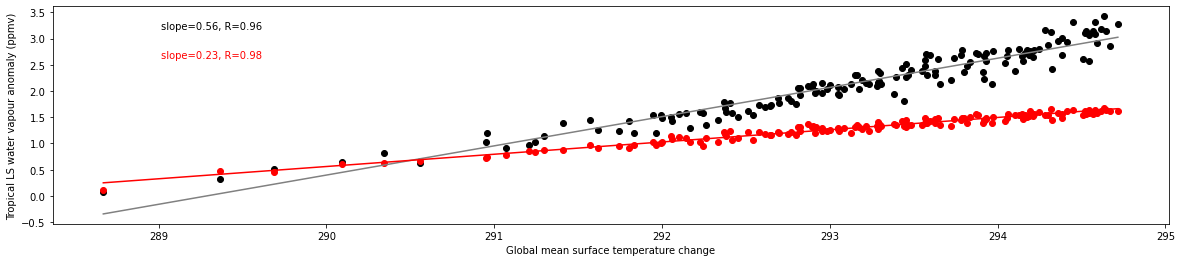

CESM2-WACCM


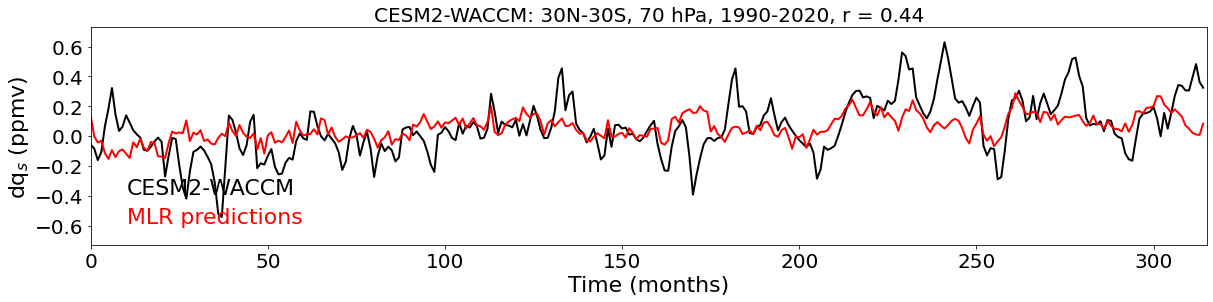

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  0.37331874507334006


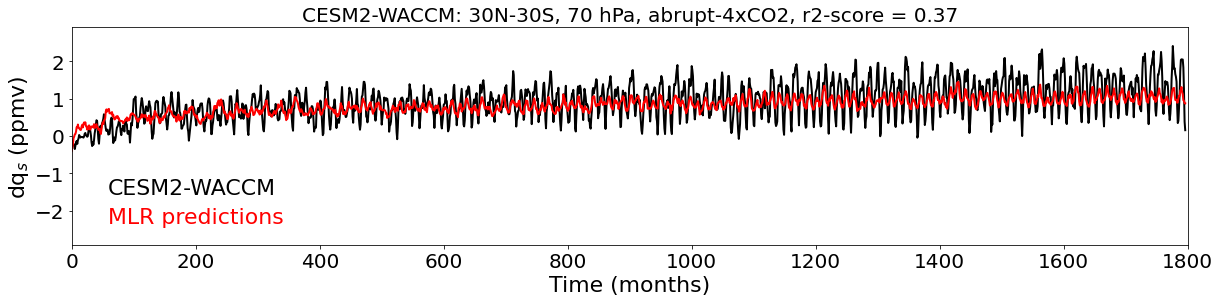

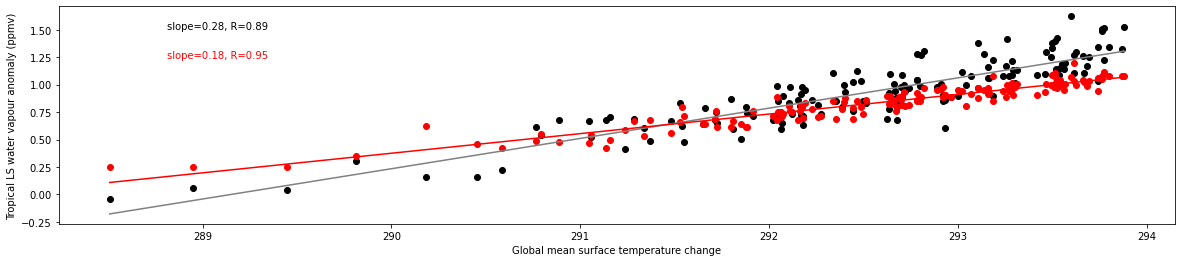

HadGEM3-GC31-LL


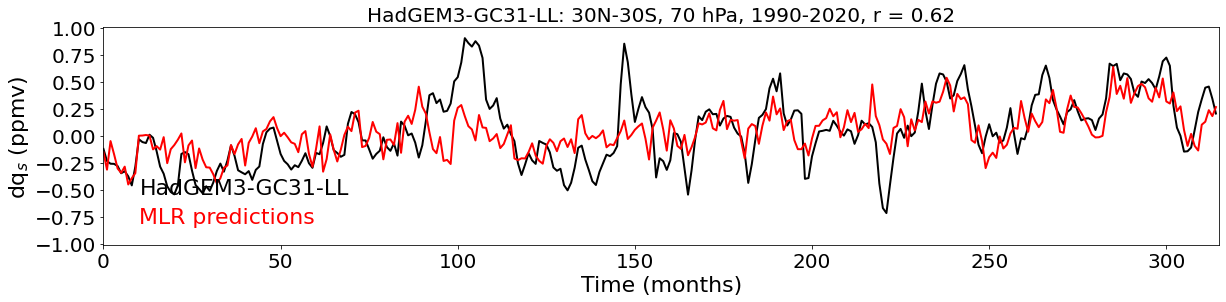

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  -6.743671278680089


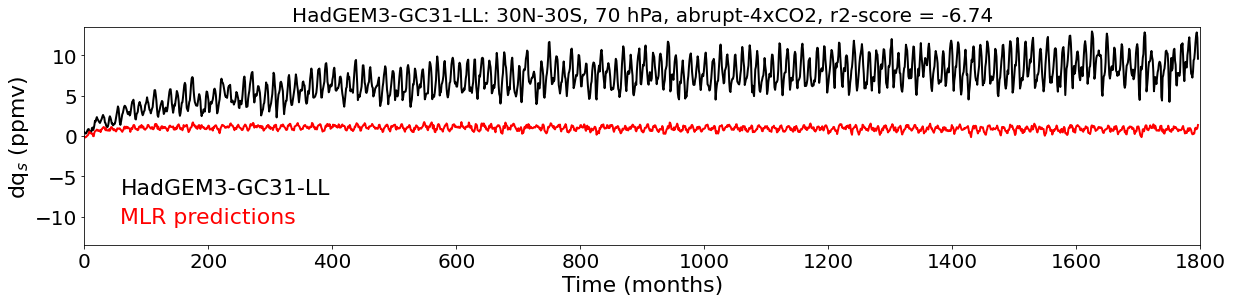

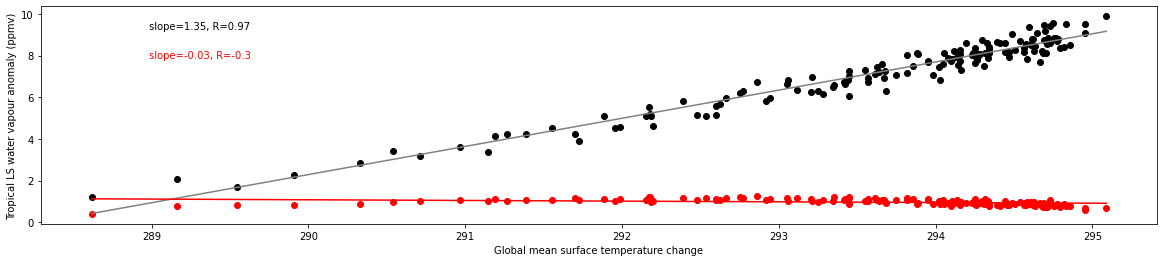

INM-CM4-8


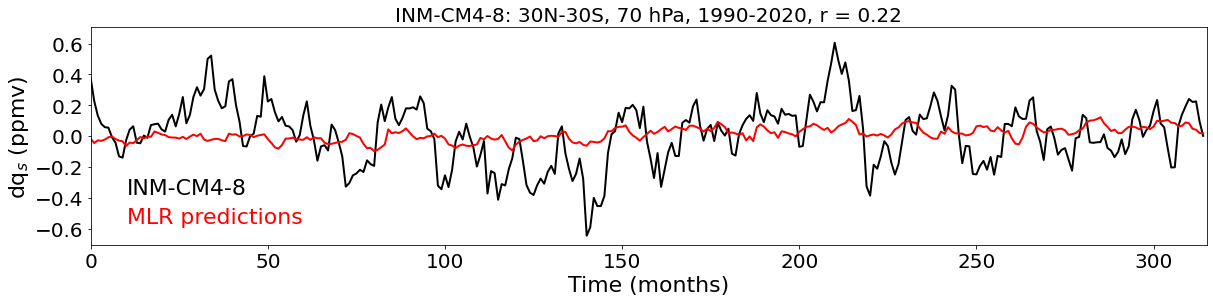

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  -0.24252002676888518


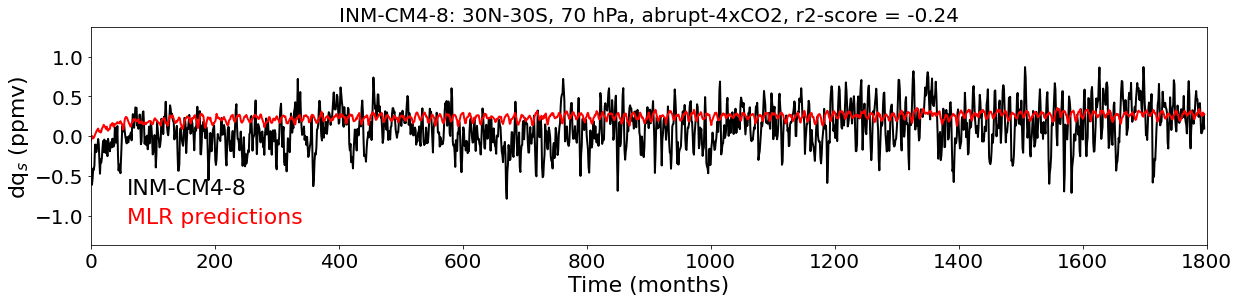

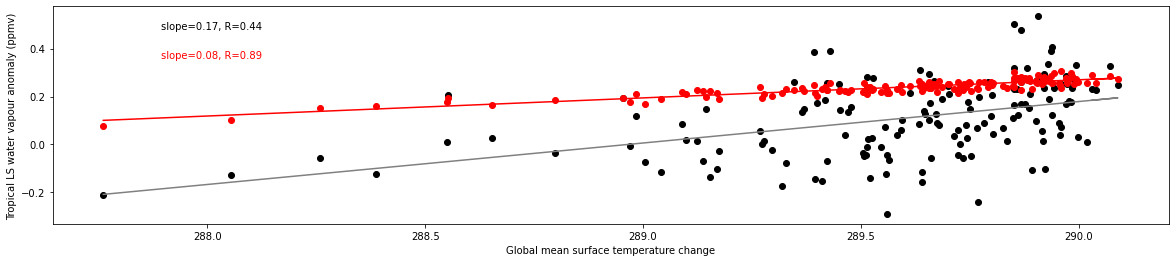

INM-CM5-0


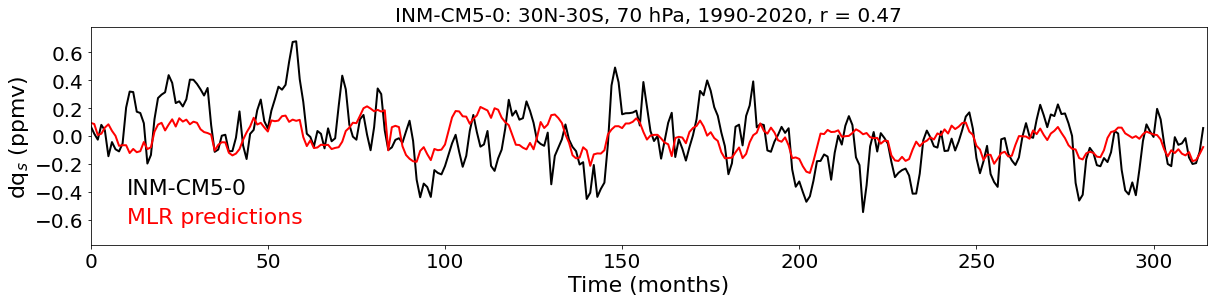

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  -1.4699310382970796


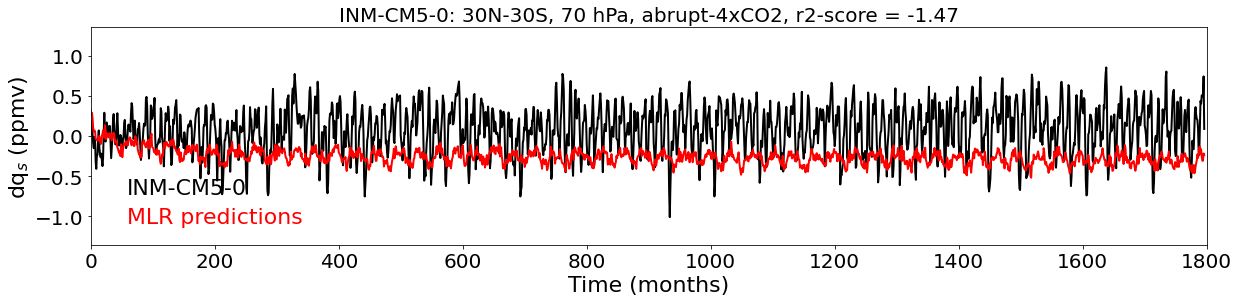

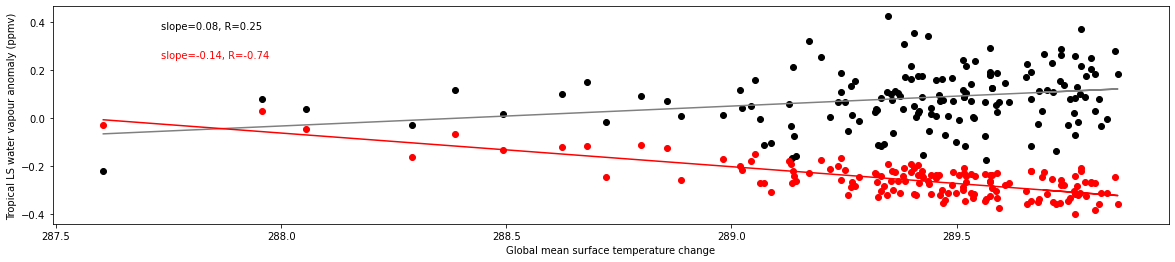

MPI-ESM1-2-LR


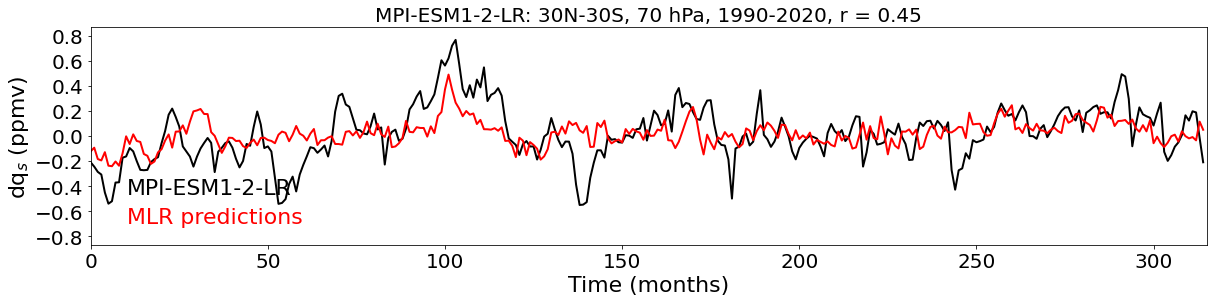

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  -6.043890979213708


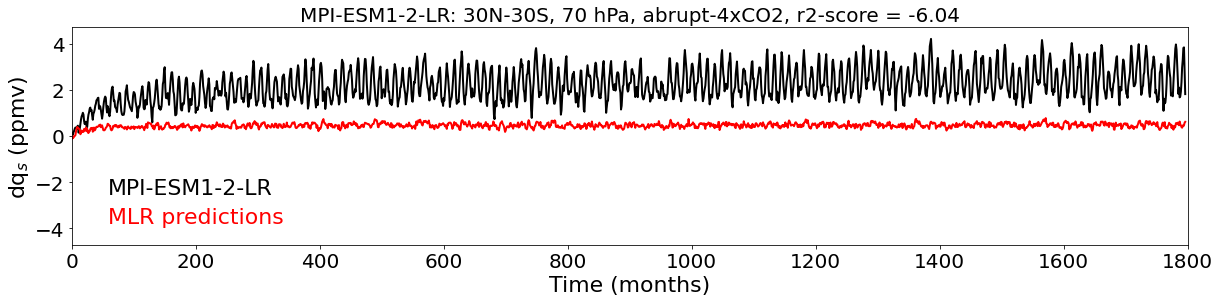

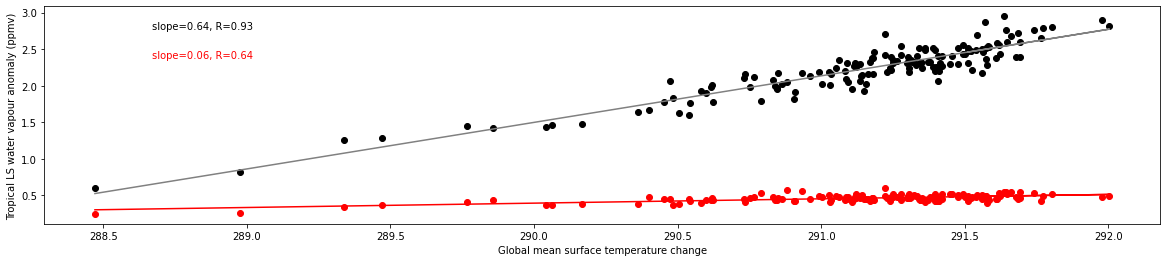

UKESM1-0-LL


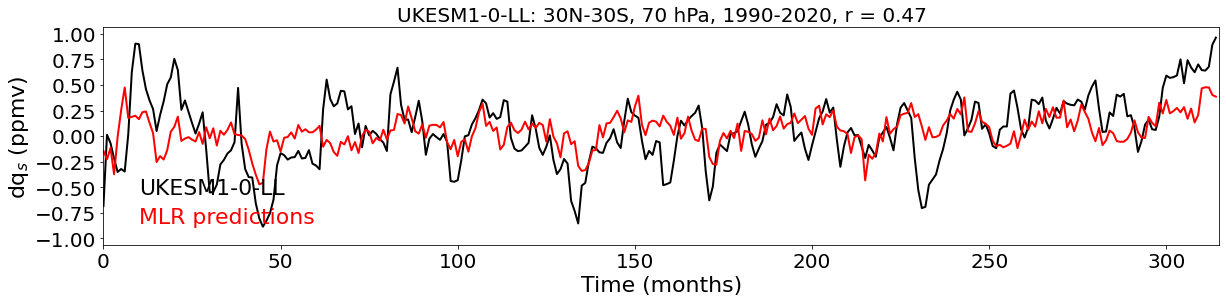

(1797, 4) 4xCO2
(1800,)
(1797,)
r2 4xCO2 predictions:  -9.302994863076592


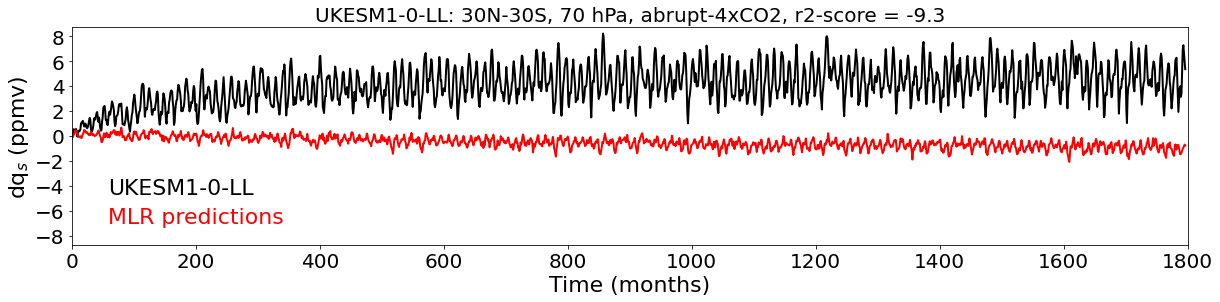

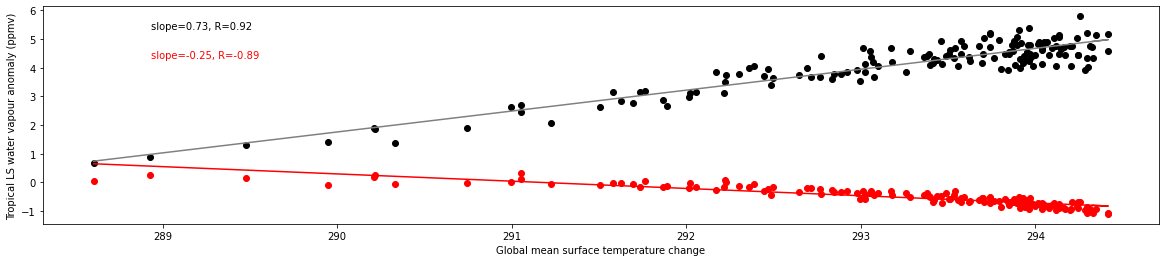

In [18]:
### fit MLR model based on four indices
lag=3
non_nan_indices_lag = non_nan_indices-lag
months = np.array(non_nan_indices_lag.flatten())
for modeli in range(0,nr_models):
    print(model_list1[modeli])
    nino34 = netCDF4.Dataset(glob.glob('./data/cmip/nino34/*'+model_list1[modeli]+'*historical*.nc')[0])['tas'][:nt_train,0,0]
    nino34_ss = np.empty((12))
    nino34_index = np.empty(nino34.shape)
    for i in range(2,nt_train):
        nino34_index[i] = np.mean(nino34[i-2:i+3])
    nino34_index[0:2] = nino34[0:2]
    for i in range(0,12):
        nino34_ss[i] = np.mean(nino34_index[i::12])
        nino34_index[i::12] = nino34_index[i::12] - nino34_ss[i]
    ua = netCDF4.Dataset(glob.glob('./data/cmip/ua/*'+model_list1[modeli]+'*historical*.nc')[0])['ua'][:nt_train,0,0]
    qbo_index = np.empty(ua.shape)
    ua_ss = np.empty((12))
    for i in range(0,12):
        ua_ss[i] = np.mean(ua[i::12])
        qbo_index[i::12] = ua[i::12] - ua_ss[i]
    ta500 = netCDF4.Dataset(glob.glob('./data/cmip/ta500_30NS/*'+model_list1[modeli]+'*historical*.nc')[0])['ta'][:nt_train,0,0]
    ta500_ss = np.empty((12))
    ta500_index = np.empty(ta500.shape)
    for i in range(0,12):
        ta500_ss[i] = np.mean(ta500[i::12])
        ta500_index[i::12] = ta500[i::12] - ta500_ss[i]
    db = netCDF4.Dataset(glob.glob('./data/cmip/diabatic_heating/*'+model_list1[modeli]+'*historical*.nc')[0])['tntr'][:nt_train,0]
    db_ss = np.empty((12))
    db_index = np.empty(db.shape)
    for i in range(0,12):
        db_ss[i] = np.mean(db[i::12])
        db_index[i::12] = db[i::12] - db_ss[i]
    X_hist = np.vstack((nino34_index[:-lag],qbo_index[:-lag,0],ta500_index[:-lag,0],db_index[2:-lag+2])).T
    level_selected=1
### now load SWV data; convert kg/kg air to volume mixing ratios in ppmv
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list1[modeli]+'*historical*.nc')[0])['hus'][:nt_train,level_selected,0,0]*1e6/0.6213
    Y_anomaly = np.empty(Y_raw_hist.shape)
    Y_ss = np.empty((12))
    for i in range(0,12):
        Y_ss[i] = np.mean(Y_raw_hist[i::12])
        Y_anomaly[i::12] = Y_raw_hist[i::12] - Y_ss[i]
    Y_anomaly = Y_anomaly[lag:]
    ### subselect samples according to SWOOSH mask and when simulations start (not all timelines are the same due to missing data, see Online Methods)
    if model_list1[modeli] in model_list_cmip5_1968:
### first 192 months can be considered fully covered for the model, similar to the last 192 months in SWOOSH. Critical is the masking from 72+192 onwards; covering Pinatubo
        shifted_months = months[:-192]+192
        months_modeli = np.concatenate([np.arange(0,192),shifted_months])
    elif model_list1[modeli] in model_list_cmip6_1977:
        shifted_months = months[:-84]+84
        months_modeli = np.concatenate([np.arange(0,84),shifted_months])
    else:
        months_modeli = months
    X_hist_selected = X_hist[months_modeli,:]
    Y_anomaly_selected = Y_anomaly[months_modeli]
    reg = LinearRegression().fit(X_hist_selected, Y_anomaly_selected)
    dict_regr_results[model_list1[modeli]] = [reg]
    Y_pred_train = reg.predict(X_hist_selected)
    plt.plot(np.arange(0,315),Y_anomaly_selected,color='k',linewidth=2)
    plt.plot(np.arange(0,315),Y_pred_train,color='r',linewidth=2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Time (months)',size=22)
    plt.ylabel('dq$_s$ (ppmv)',size=22)
#     plt.title(model_list1[modeli]+': 30N-30S, 70 hPa, 1990-2020, r2-score = '+str(round(r2_score(Y_anomaly_selected[:],Y_pred_train),2)),size=20)    
    plt.title(model_list1[modeli]+': 30N-30S, 70 hPa, 1990-2020, r = '+str(round(np.corrcoef(Y_anomaly_selected[:],Y_pred_train)[0,1],2)),size=20)    
    plt.xlim(0,315)
    plt.figtext(0.15,0.3,model_list1[modeli],color='k',size=22)
    plt.figtext(0.15,0.2,'MLR predictions',color='r',size=22)
    plt.ylim(-(np.max(Y_anomaly_selected[:]+0.1)),np.max(Y_anomaly_selected[:])+0.1)
    plt.show()
    nt_4xco2 = 1800
    nino34_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/nino34/*'+model_list1[modeli]+'*4xCO2*.nc')[0])['tas'][:nt_4xco2,0,0]
    nino34_index_4xco2 = np.empty(nino34_4xco2.shape)
    for i in range(2,nt_4xco2):
        nino34_index_4xco2[i] = np.mean(nino34_4xco2[i-2:i+3])
    nino34_index_4xco2[0:2] = nino34_4xco2[0:2]
    for i in range(0,12):
        nino34_index_4xco2[i::12] = nino34_index_4xco2[i::12] - nino34_ss[i]
    ua_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ua/*'+model_list1[modeli]+'*4xCO2*.nc')[0])['ua'][:nt_4xco2,0,0]
    qbo_index_4xco2 = np.empty(ua_4xco2.shape)
    for i in range(0,12):
        qbo_index_4xco2[i::12] = ua_4xco2[i::12] - ua_ss[i]
    ta500_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta500_30NS/*'+model_list1[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,0,0]
    ta500_index_4xco2 = np.empty(ta500_4xco2.shape)
    for i in range(0,12):
        ta500_index_4xco2[i::12] = ta500_4xco2[i::12] - ta500_ss[i]
    db_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/diabatic_heating/*'+model_list1[modeli]+'*4xCO2*.nc')[0])['tntr'][:nt_4xco2,0]
    db_index_4xco2 = np.empty(db_4xco2.shape)
    for i in range(0,12):
        db_index_4xco2[i::12] = db_4xco2[i::12] - db_ss[i]
    X_4xco2 = np.vstack((nino34_index_4xco2[:-lag],qbo_index_4xco2[:-lag,0],ta500_index_4xco2[:-lag,0],db_index_4xco2[2:-lag+2])).T
    print(X_4xco2.shape,'4xCO2')
    nt_4xco2 = 1800
#     ### now load SWV data; convert kg/kg air to volume mixing ratios in ppmv
    Y_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list1[modeli]+'*4xCO2*.nc')[0])['hus'][:nt_4xco2,level_selected,0,0]*1e6/0.6213
    Y_anomaly_4xco2 = np.empty(Y_raw_4xco2.shape)
    print(Y_anomaly_4xco2.shape)
    for i in range(0,12):
        Y_anomaly_4xco2[i::12] = Y_raw_4xco2[i::12] - Y_ss[i]
    Y_anomaly_4xco2 = Y_anomaly_4xco2[lag:]
    print(Y_anomaly_4xco2.shape)
    Y_pred_4xco2 = reg.predict(X_4xco2)
    print('r2 4xCO2 predictions: ', r2_score(Y_anomaly_4xco2[:],Y_pred_4xco2))
    ### load globally averaged surface temperature (to regress against the predicted/true changes in hus)
    plt.plot(np.arange(0,nt_4xco2-lag),Y_anomaly_4xco2[:],color='k',linewidth=2)
    plt.plot(np.arange(0,nt_4xco2-lag),Y_pred_4xco2,color='r',linewidth=2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Time (months)',size=22)
    plt.ylabel('dq$_s$ (ppmv)',size=22)
    plt.title(model_list1[modeli]+': 30N-30S, 70 hPa, abrupt-4xCO2, r2-score = '+str(round(r2_score(Y_anomaly_4xco2[:],Y_pred_4xco2),2)),size=20)    
    plt.xlim(0,nt_4xco2)
    plt.figtext(0.15,0.3,model_list1[modeli],color='k',size=22)
    plt.figtext(0.15,0.2,'MLR predictions',color='r',size=22)
    plt.ylim(-np.max(Y_anomaly_4xco2[:]+0.5),np.max(Y_anomaly_4xco2[:]+0.5))
    plt.show()
    tas_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/tas/tas_global_mean/tas*'+model_list1[modeli]+'*4xCO2*.nc')[0])['tas'][:nt_4xco2,0,0]
    ### prepare annual averaging of data. Since first two months drop our due to lag, start after the first year
    Y_pred_4xco2_am = np.empty((int((Y_pred_4xco2.shape[0]-12+lag)/12)))
    Y_4xco2_am = np.empty((int((Y_anomaly_4xco2.shape[0]-12+lag)/12)))
    tas_4xco2_am = np.empty((int((tas_4xco2.shape[0]-12)/12)))
    for i in np.arange(0,int(Y_pred_4xco2.shape[0]-12+lag),12):
        Y_pred_4xco2_am[int(i/12)] = np.mean(Y_pred_4xco2[i+12-lag:i+24-lag],axis=0)
        Y_4xco2_am[int(i/12)] = np.mean(Y_anomaly_4xco2[i+12-lag:i+24-lag],axis=0)
        tas_4xco2_am[int(i/12)] = np.mean(tas_4xco2[i+12-lag:i+24-lag],axis=0)
    ### estimate true feedback (slope) in ppmv/degree Kelvin warming
    res_mm_true_am = stats.linregress(tas_4xco2_am[:],Y_4xco2_am[:])
    ### visualize the results
    plt.scatter(tas_4xco2_am[:],Y_4xco2_am[:],color='k')
    plt.plot(tas_4xco2_am[:],res_mm_true_am.intercept + res_mm_true_am.slope*tas_4xco2_am[:],'gray')
    plt.figtext(0.2,0.8,'slope='+str(round(res_mm_true_am.slope,2))+', R='+str(round(res_mm_true_am.rvalue,2)),color='k')
    plt.xlabel('Global mean surface temperature change')
    plt.ylabel('Tropical LS water vapour anomaly (ppmv)')
    res_mm_pred_am = stats.linregress(tas_4xco2_am[:],Y_pred_4xco2_am[:])
    plt.scatter(tas_4xco2_am[:],Y_pred_4xco2_am[:],color='r')
    plt.plot(tas_4xco2_am[:],res_mm_pred_am.intercept + res_mm_pred_am.slope*tas_4xco2_am[:],'r')
    plt.figtext(0.2,0.7,'slope='+str(round(res_mm_pred_am.slope,2))+', R='+str(round(res_mm_pred_am.rvalue,2)),color='r')
    plt.show()    
#     ### save the results
    feedbacks_true_am[modeli] = res_mm_true_am.slope
    feedbacks_pred_am[modeli] = res_mm_pred_am.slope

In [19]:
dict_regr_results['feedbacks_true_am'] = feedbacks_true_am
dict_regr_results['feedbacks_pred_am'] = feedbacks_pred_am

In [20]:
# joblib.dump(dict_regr_results,'./MLR_model_nino34_qbo_ta500_lagged_diabaticheating_7models.pkl')

['./MLR_model_nino34_qbo_ta500_lagged_diabaticheating_7models.pkl']

In [21]:
model_list1 = ['CESM2_', 
               'CESM2-WACCM', 'HadGEM3-GC31-LL', 'INM-CM4-8', 
               'INM-CM5-0', 'MPI-ESM1-2-LR', 'UKESM1-0-LL']

In [23]:
data = pd.read_csv('./data/results/SVW_feedback_results_60NS_allmodels_315samples_50_realisations_SWOOSH_finalNatGeo.csv',index_col='Unnamed: 0')

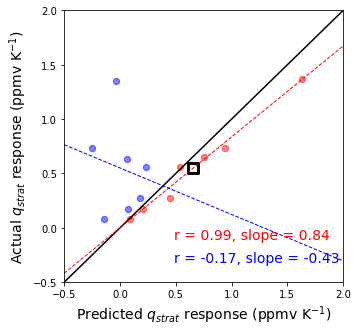

In [28]:
plt.rcParams['figure.figsize'] = [5, 5]
x_range = np.arange(-0.5,2.25,0.05)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['feedbacks_pred_am'].loc[model_list1].values,data['feedbacks_true_am'].loc[model_list1].values)
plt.plot(x_range,x_range, color='k',linewidth=1.5,linestyle='-')
plt.scatter(data['feedbacks_pred_am'].loc[model_list1].values,data['feedbacks_true_am'].loc[model_list1].values,color='r',marker='o',s=40,alpha=0.5)
plt.scatter(np.mean(data['feedbacks_pred_am'].loc[model_list1].values),np.mean(data['feedbacks_true_am'].loc[model_list1].values),marker='s',s=90,color='white',edgecolors='k',linewidths=3)
plt.plot(x_range,intercept+slope*x_range,color='r',linestyle='--',linewidth=1)
plt.scatter(feedbacks_pred_am,feedbacks_true_am,color='b',alpha=0.5,s=40,marker='o')
slope_s, intercept_s, r_value_s, p_value_s, std_err_s = stats.linregress(feedbacks_pred_am,feedbacks_true_am)
plt.plot(x_range,intercept_s+slope_s*x_range,color='b',linestyle='--',linewidth=1)
plt.xlim(-0.5,2.0)
plt.ylim(-0.5,2.0)
plt.xlabel('Predicted $q_{strat}$ response (ppmv K$^{-1}$)',size=14)
plt.ylabel('Actual $q_{strat}$ response (ppmv K$^{-1}$)',size=14)
plt.figtext(0.43,0.245,'r = '+str("{:.2f}".format(round(r_value,2)))+', slope = '+str("{:.2f}".format(round(slope,2))),size=14,color='r')
plt.figtext(0.43,0.18,'r = '+str("{:.2f}".format(round(r_value_s,2)))+', slope = '+str("{:.2f}".format(round(slope_s,2))),size=14,color='b')
plt.show()